# Classification: Logistic Reression

Concepts you will learn:
- Logistic regression
- Categorical vs Numerical variables
- Imputing missing values
- Scaling the variables
- Outliers and a simple removal procedures
- Feature importance
- Evaluation metrics: Accuracy and Confustion metrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
centers = [[-5, 0], [0, 1.5]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)

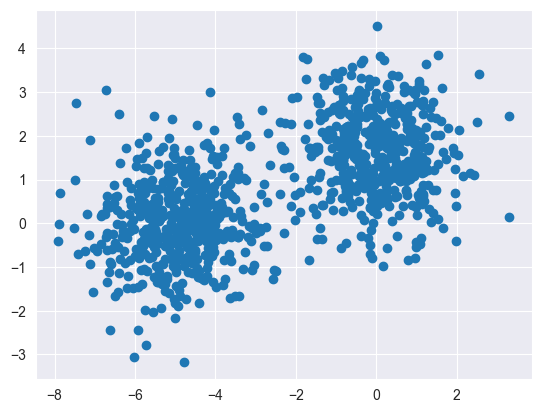

In [3]:
plt.scatter(X[:, 0], X[:, 1])

training score : 0.994


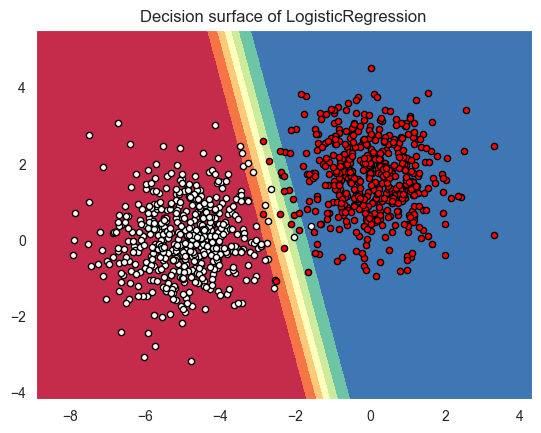

In [4]:
clf = LogisticRegression().fit(X, y)

# print the training scores
print("training score : %.3f" % (clf.score(X, y)))

display = DecisionBoundaryDisplay.from_estimator(
    clf, X, response_method="predict_proba", cmap=plt.cm.Spectral
)
plt.title("Decision surface of LogisticRegression")
plt.axis("tight")

# Plot also the training points
for i, color in zip(clf.classes_, "wr"):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0], X[idx, 1], c=color, edgecolor="black", s=20
    )

## One-dimensional and probability

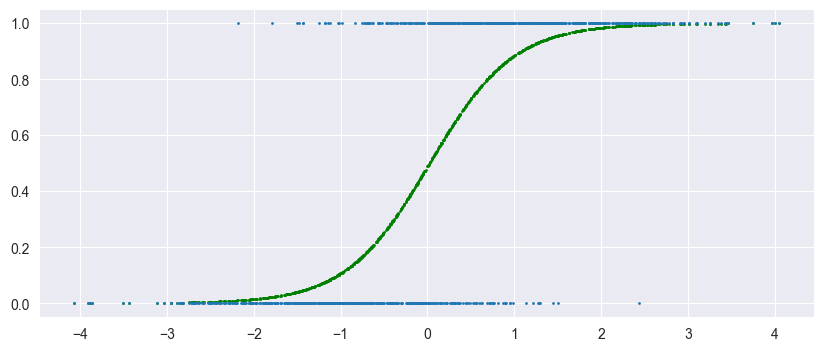

In [5]:
centers = [[-1], [1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)

clf = LogisticRegression().fit(X, y)

probs = clf.predict_proba(X)

plt.figure(figsize=(10, 4))
plt.scatter(X, probs[:, 1], s=1, c='g')
plt.scatter(X, y, s=1)

# A real dataset classification

In [11]:
import pandas as pd

wdf = pd.read_csv("./data/weatherAUS.csv")

wdf.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


## 1. Feature Exploration

- Split numerical and categorical variables
- Count the missing values and % for each column

In [12]:
numerical_cols = [c for c in wdf.columns if wdf[c].dtype != 'O']
categorical_cols = [c for c in wdf.columns if wdf[c].dtype == 'O']

target_col = "RainTomorrow"

wdf = wdf[~wdf[target_col].isna()]

In [13]:
wdf[numerical_cols].isnull().sum()
wdf[numerical_cols].isnull().mean()

MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustSpeed    0.065193
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am      0.098556
Pressure3pm      0.098324
Cloud9am         0.377353
Cloud3pm         0.401525
Temp9am          0.006358
Temp3pm          0.019171
dtype: float64

In [14]:
wdf.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

## 2. Classification with only numericals

In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def get_null_accuracy(df):
    null_acc = df[target_col].value_counts()/len(df)
    print(f"Null accuracy: {null_acc.max() * 100: .2f}%")
    return null_acc

def split_data(df):
    X = df.drop([target_col], axis=1)
    y = df[target_col].apply(lambda y: 1 if y.lower() == 'yes' else 0)

    return train_test_split(X, y, test_size = 0.2, random_state = 0)


def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'Train accuracy score: {accuracy_score(y_train, model.predict(X_train)) * 100:.2f}%')
    print(f'Test accuracy score: {accuracy_score(y_test, y_pred) * 100:0.2f}%')
    
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    return model

### Dropping all na values

Remaining dataset: 58090 out of 142193.
Null accuracy:  78.09%
Train accuracy score: 85.30%
Test accuracy score: 85.52%


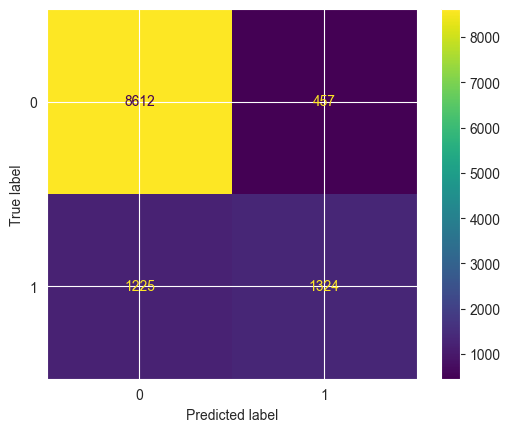

LogisticRegression(random_state=0, solver='liblinear')

In [16]:
df0 = wdf[numerical_cols + [target_col]].dropna()

print(f"Remaining dataset: {len(df0)} out of {len(wdf)}.")

get_null_accuracy(df0)
X_train, X_test, y_train, y_test = split_data(df0)

fit_and_evaluate(X_train, y_train, X_test, y_test)

###  Impute missing values: median or mean

**IMPORTANT**: Imputation is only taking places based on the train data

When there are outliers in the dataset, we should use median imputation.

In [17]:
df1 = wdf[numerical_cols + [target_col]]

X_train, X_test, y_train, y_test = split_data(df1)

for df in [X_train, X_test]:
    for col in numerical_cols:
        col_median = X_train[col].median()
        df[col].fillna(col_median, inplace=True)

X_train[numerical_cols].isnull().mean()

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
dtype: float64

Train accuracy score: 83.93%
Test accuracy score: 84.20%


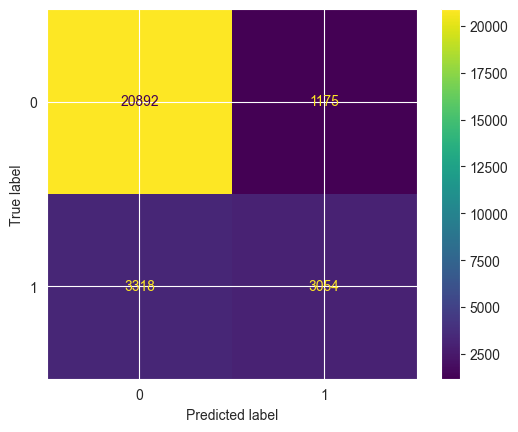

LogisticRegression(random_state=0, solver='liblinear')

In [18]:
fit_and_evaluate(X_train, y_train, X_test, y_test)

**Note**: Accuracy is lower but we now we can handel all incoming test data

### Exclude outliers

Outlier is a data point which is far away from the rest of population

In [19]:
df1[numerical_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


<AxesSubplot: >

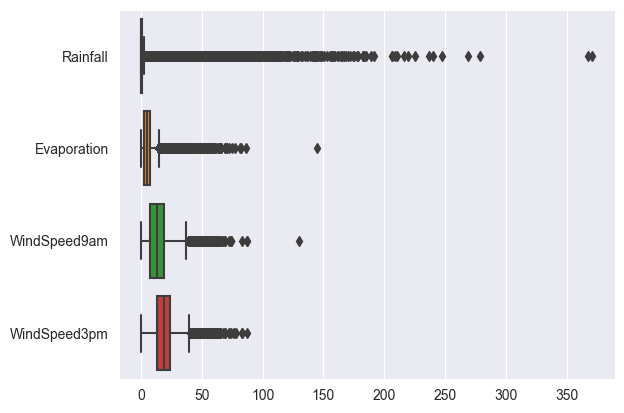

In [20]:
outlier_cols = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
sns.boxplot(wdf[outlier_cols], orient='h')

In [21]:
def get_upper_fence(x):
    IQR = x.quantile(0.75) - x.quantile(0.25)
    return x.quantile(0.75) + 3 * IQR


for outlier_col in outlier_cols:
    train_upper_fence = get_upper_fence(X_train[outlier_col])
    X_train[outlier_col] = np.where(X_train[outlier_col] > train_upper_fence, train_upper_fence, X_train[outlier_col])
    X_test[outlier_col] = np.where(X_test[outlier_col] > train_upper_fence, train_upper_fence, X_test[outlier_col])


<AxesSubplot: >

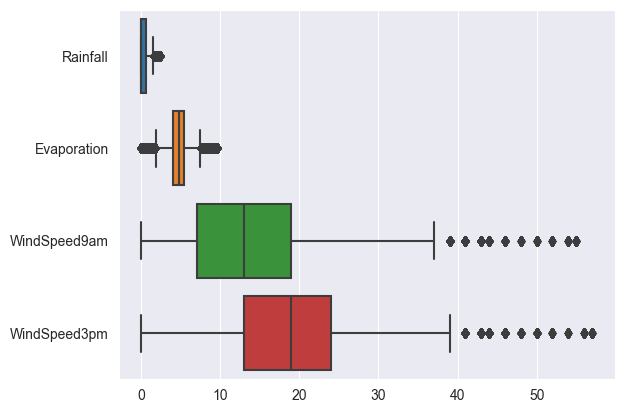

In [22]:
outlier_cols = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
sns.boxplot(X_train[outlier_cols], orient='h')

Train accuracy score: 84.06%
Test accuracy score: 84.38%


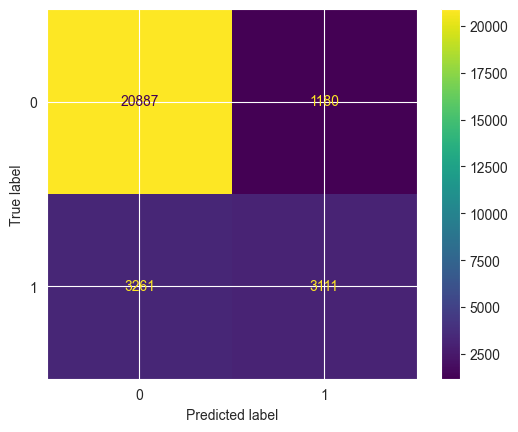

LogisticRegression(random_state=0, solver='liblinear')

In [23]:
fit_and_evaluate(X_train, y_train, X_test, y_test)

### Scaling

- Comparison of very large variable with small ones does not make sense

In [24]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.550083,4.931688,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643
std,6.388279,7.094149,0.925598,2.140198,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000
max,33.900000,48.100000,2.400000,9.600000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**NOTE**: scaler is learned on train data and then extended to test data

In [26]:
X_train = pd.DataFrame(X_train, columns=[numerical_cols])
X_test = pd.DataFrame(X_test, columns=[numerical_cols])

X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.229201,0.513717,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,0.613895,0.610258,0.516867,0.587949,0.510444,0.519936
std,0.151741,0.134105,0.385666,0.222937,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,0.111383,0.106803,0.254747,0.264731,0.136366,0.131586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.416667,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,0.545455,0.542400,0.333333,0.500000,0.411392,0.424184
50%,0.479810,0.517958,0.000000,0.500000,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,0.613223,0.609600,0.555556,0.625000,0.504219,0.508637
75%,0.593824,0.623819,0.250000,0.562500,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,0.682645,0.676800,0.666667,0.750000,0.605485,0.608445
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Train accuracy score: 84.22%
Test accuracy score: 84.61%


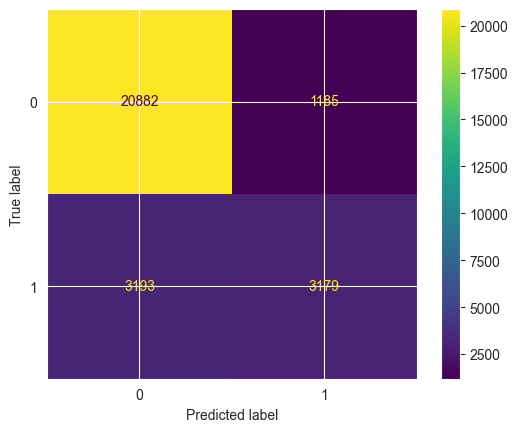

In [28]:
model = fit_and_evaluate(X_train, y_train, X_test, y_test)

## 3. Feature importance

Feature: MinTemp, Importance score: -0.30825
Feature: MaxTemp, Importance score: -1.42917
Feature: Rainfall, Importance score: 0.69753
Feature: Evaporation, Importance score: 0.01364
Feature: Sunshine, Importance score: -1.52604
Feature: WindGustSpeed, Importance score: 6.53888
Feature: WindSpeed9am, Importance score: -0.57182
Feature: WindSpeed3pm, Importance score: -1.28943
Feature: Humidity9am, Importance score: 0.42518
Feature: Humidity3pm, Importance score: 5.34146
Feature: Pressure9am, Importance score: 6.01590
Feature: Pressure3pm, Importance score: -10.10697
Feature: Cloud9am, Importance score: 0.10843
Feature: Cloud3pm, Importance score: 1.06020
Feature: Temp9am, Importance score: 0.84183
Feature: Temp3pm, Importance score: 1.32006


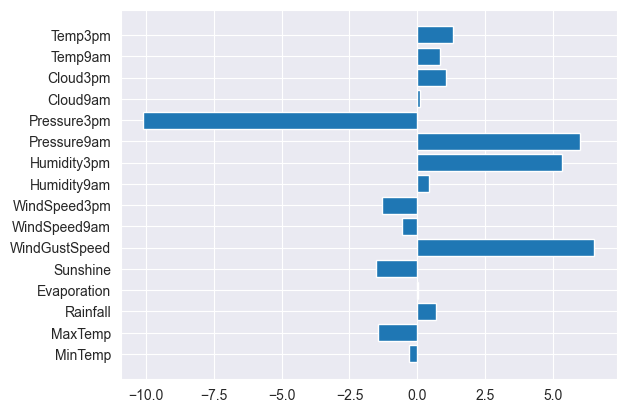

In [38]:
importance = model.coef_[0]
# summarize feature importance
for v, col in zip(importance, X_train.columns):
    print(f'Feature: {col[0]}, Importance score: {v:.5f}')

plt.barh([c[0] for c in X_train.columns], importance)
plt.show()

## 4. Including Categorical variables

In [195]:
df2 = wdf.drop("Date", axis=1)
categorical_cols = [c for c in categorical_cols if c != "Date"]

### Imputing missing values with mode

In [197]:
for c in categorical_cols:
    df2[c].fillna(df2[c].mode()[0], inplace=True)

### One-hot encoding

In [199]:
df2 = pd.get_dummies(df2, columns=categorical_cols)
df2.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,1,0,1,0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,1,1,0,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,1,1,0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,1,0,1,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,1,0,1,0


## 💀 Exercise

Repeat the above by including the categorical variables:
- impute the missing values
- remove outliers
- scale

and see if the performance is increased.